# Introducción de 10 minutos a Pandas

In [2]:
import numpy as np
import pandas as pd

## Crear una serie de datos

#### En Pandas la escritura de la funciones es: pd.Funcion. Debe recordar colocar el punto. Otro aspecto a resaltar es que muchas funciones comienzaN con letras mayuscula (Series), lo que puede ser un poco confuso si vienes de R.

#### Para crear una serie de datos, utilizamos la función: pd.Series()

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

#### Vamos a crear ahora una serie de datos de fecha, para ello utilizaremos la funcion: pd.date_range()

In [5]:
dates = pd.date_range("20130101", periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

#### Para crear un data frame, utilizaremos la función: pd.DataFrame()

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [8]:
df

,A,B,C,D
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-03,0.272427,0.445342,0.127493,-2.061061
2013-01-04,0.818050,0.017886,-0.316788,-0.500438
2013-01-05,-0.396777,0.443381,1.930640,-0.437389
2013-01-06,-0.501817,-1.108095,0.025612,-0.557739


#### Podemos crear el data frame de otra forma, utilizando pares de clave valor con un Diccionario de Python, pero con la misma función pd.DataFrame()

In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)


In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#### Para conocer el tipo de datos de un data frame, debemos utilizar el método: dataframe.dtypes

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Visualizar los datos

#### Para visualizar las primeras y últimas filas de la tabla, utilizaremos: df.head() y df.tail() respectivamente

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-03,0.272427,0.445342,0.127493,-2.061061
2013-01-04,0.818050,0.017886,-0.316788,-0.500438
2013-01-05,-0.396777,0.443381,1.930640,-0.437389


In [14]:
df.tail()

,A,B,C,D
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-03,0.272427,0.445342,0.127493,-2.061061
2013-01-04,0.818050,0.017886,-0.316788,-0.500438
2013-01-05,-0.396777,0.443381,1.930640,-0.437389
2013-01-06,-0.501817,-1.108095,0.025612,-0.557739


#### Para ver los indices de las columnas df.index y para saber los nombres df.columns. Son métodos, no llevan paréntesis

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

#### La función df.describe() muestra un resumen estadístico rápido de sus datos: count, mean, std, min, max y percentiles

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.045965,0.018996,0.144676,-0.457732
std,0.479036,0.604520,0.909104,1.102124
min,-0.501817,-1.108095,-0.517601,-2.061061
25%,-0.298074,-0.087045,-0.365173,-0.585869
50%,0.041952,0.227684,-0.145588,-0.529088
75%,0.225787,0.441906,0.102023,-0.453151
max,0.818050,0.445342,1.930640,1.405483


#### Para trasponer los datos (intercambiar filas por columnas), debemos utilizar el método: df.T

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.001965,0.085869,0.272427,0.818050,-0.396777,-0.501817
B,0.437481,-0.122022,0.445342,0.017886,0.443381,-1.108095
C,-0.381301,-0.517601,0.127493,-0.316788,1.930640,0.025612
D,-0.595245,1.405483,-2.061061,-0.500438,-0.437389,-0.557739


#### Podemos ordenar los datos por índice df.sort_index() o por valor df.sort_values(by =). Para sort_values es imprescindible definir el nombre de la columna para ordenar.

In [21]:
df.sort_index(ascending=False) #Ordenar en forma descendente

,A,B,C,D
2013-01-06,-0.501817,-1.108095,0.025612,-0.557739
2013-01-05,-0.396777,0.443381,1.930640,-0.437389
2013-01-04,0.818050,0.017886,-0.316788,-0.500438
2013-01-03,0.272427,0.445342,0.127493,-2.061061
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245


In [22]:
df.sort_values(by = "C") #Ordenar los valores de la tabla, en base a la columna C

,A,B,C,D
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245
2013-01-04,0.818050,0.017886,-0.316788,-0.500438
2013-01-06,-0.501817,-1.108095,0.025612,-0.557739
2013-01-03,0.272427,0.445342,0.127493,-2.061061
2013-01-05,-0.396777,0.443381,1.930640,-0.437389


## Selección de columnas

#### Para la selección de columnas e indices, pueden utilizarse métodos tradicionales con corchetes []. Sin embargo, PANDAS pone a disposicion unos metodos que son mas directos y utiles: .at, .iat, .loc and .iloc.

#### Para seleccionar una columna, solo tenemos que utilizar corchetes, y el nombre la columna en comillas: df["A"]

In [23]:
df["A"]

2013-01-01   -0.001965
2013-01-02    0.085869
2013-01-03    0.272427
2013-01-04    0.818050
2013-01-05   -0.396777
2013-01-06   -0.501817
Freq: D, Name: A, dtype: float64

#### Para seleccionar filas, podemos utilizar corchetes, y definir cuántas filas queremos df[0:3]

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-03,0.272427,0.445342,0.127493,-2.061061


#### Podemos hacer los mismo con texto, si de antemano conocemos los índices de las filas

In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-03,0.272427,0.445342,0.127493,-2.061061
2013-01-04,0.818050,0.017886,-0.316788,-0.500438


### 1. Seleccionar por etiquetas (nombre de la fila o la columna) - Función .loc

#### Podemos obtener una selección transversal (seleccionar las filas y las columnas al mismo tiempo), utilizando df.loc[[0]]

In [26]:
df.loc[dates[0]] #Selecciona la primera fila y los valores de todas sus columnas, y los traspone

A   -0.001965
B    0.437481
C   -0.381301
D   -0.595245
Name: 2013-01-01 00:00:00, dtype: float64

#### También podemos hacer selecciones múltiples con df.loc[["A", "B"]]

In [27]:
df.loc[:, ["A", "B"]] #Selecciona todos los valores ":" de las columnas A y B

,A,B
2013-01-01,-0.001965,0.437481
2013-01-02,0.085869,-0.122022
2013-01-03,0.272427,0.445342
2013-01-04,0.818050,0.017886
2013-01-05,-0.396777,0.443381
2013-01-06,-0.501817,-1.108095


In [28]:
df.loc["20130102":"20130104", ["A", "B", "C"]] #Selecciona columnas y filas con criterios especificos

,A,B,C
2013-01-02,0.085869,-0.122022,-0.517601
2013-01-03,0.272427,0.445342,0.127493
2013-01-04,0.818050,0.017886,-0.316788


In [29]:
df.loc["20130102", ["A", "B"]] #Esta sintaxis, reduce la dimensión del objeto de salida

A    0.085869
B   -0.122022
Name: 2013-01-02 00:00:00, dtype: float64

### 2. Seleccionar por posición - Función .iloc (index location)

#### Seleccionar a través de la posición de los enteros df.iloc[ ]

In [30]:
df.iloc[3] #Devuelve los datos de la fila 3 y todas sus columnas

A    0.818050
B    0.017886
C   -0.316788
D   -0.500438
Name: 2013-01-04 00:00:00, dtype: float64

#### Por secciones, actuando de manera similar a NumPy/Python: df.iloc[3:5, 0:2]

In [31]:
df.iloc[3:5, 0:2] #Devuelve los datos de las filas 3 a la 5, y de las columnas 0 a 2

,A,B
2013-01-04,0.818050,0.017886
2013-01-05,-0.396777,0.443381


#### Por una lista de ubicaciones de posición de enteros, similar al estilo NumPy/Python

In [32]:
df.iloc[[1, 2, 4], [0, 2]] #Se crea una lista, y dentro de la lista se definen los criterios de selección

,A,C
2013-01-02,0.085869,-0.517601
2013-01-03,0.272427,0.127493
2013-01-05,-0.396777,1.930640


#### Por selección simple de filas

In [33]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-03,0.272427,0.445342,0.127493,-2.061061


#### Por selección simple de columnas

In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.437481,-0.381301
2013-01-02,-0.122022,-0.517601
2013-01-03,0.445342,0.127493
2013-01-04,0.017886,-0.316788
2013-01-05,0.443381,1.930640
2013-01-06,-1.108095,0.025612


#### Para seleccionar un valor específico

In [35]:
df.iloc[1, 1]

-0.12202150042599502

### 3. Selecciones por condicionales (boolean)

#### En este caso, podemos seleccionar una columna, y luego agregar un operador condicional

In [36]:
df[df["A"] > 0] #Los valores de la columna A que sean mayores a 0

,A,B,C,D
2013-01-02,0.085869,-0.122022,-0.517601,1.405483
2013-01-03,0.272427,0.445342,0.127493,-2.061061
2013-01-04,0.818050,0.017886,-0.316788,-0.500438


#### También podemos hacer esto para todo el data frame

In [37]:
df[df > 0] #Todos los valores de la tabla de datos, que sean mayores a 0

,A,B,C,D
2013-01-01,NaN,0.437481,NaN,NaN
2013-01-02,0.085869,NaN,NaN,1.405483
2013-01-03,0.272427,0.445342,0.127493,NaN
2013-01-04,0.818050,0.017886,NaN,NaN
2013-01-05,NaN,0.443381,1.930640,NaN
2013-01-06,NaN,NaN,0.025612,NaN


## Trabajar con valores nulos/faltantes - Missing data

#### Pandas usa principalmente el valor "np.nan" para representar datos faltantes. Por defecto no se incluye en los cálculos.

#### Haremos una modificación a la tabla de datos para poder trabajar con Missing Data.  La reindexación le permite cambiar/agregar/eliminar el índice en un eje específico.


In [38]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [39]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [40]:
df1

,A,B,C,D,E
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245,1.0
2013-01-02,0.085869,-0.122022,-0.517601,1.405483,1.0
2013-01-03,0.272427,0.445342,0.127493,-2.061061,NaN
2013-01-04,0.818050,0.017886,-0.316788,-0.500438,NaN


#### Para eliminar cualquier fila a la que le falten datos utilizamos: df.dropna()

In [41]:
df1.dropna(how="any") #Esto elimina todas las filas que tengan algún valor nulo

,A,B,C,D,E
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245,1.0
2013-01-02,0.085869,-0.122022,-0.517601,1.405483,1.0


#### También podemos reemplazar los na con el valor que queramos utilizando: df.fillna(value=)

In [42]:
df1.fillna(value = 2)

,A,B,C,D,E
2013-01-01,-0.001965,0.437481,-0.381301,-0.595245,1.0
2013-01-02,0.085869,-0.122022,-0.517601,1.405483,1.0
2013-01-03,0.272427,0.445342,0.127493,-2.061061,2.0
2013-01-04,0.818050,0.017886,-0.316788,-0.500438,2.0


#### Para obtener un resultado boolean de dónde se encuentran los na, debemos utilizar: pd.isna(df)

In [43]:
pd.isna(df1) #Donde apareza True, ese valor es un na

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operaciones

#### Estadísticos básicos: media, mediana, desviacion, minimo, maximo, conteo.

In [44]:
df.mean()

A    0.045965
B    0.018996
C    0.144676
D   -0.457732
dtype: float64

In [45]:
df.mean(1)

2013-01-01   -0.135257
2013-01-02    0.212932
2013-01-03   -0.303950
2013-01-04    0.004678
2013-01-05    0.384964
2013-01-06   -0.535510
Freq: D, dtype: float64

In [46]:
df.median()

A    0.041952
B    0.227684
C   -0.145588
D   -0.529088
dtype: float64

In [47]:
df.std()

A    0.479036
B    0.604520
C    0.909104
D    1.102124
dtype: float64

In [48]:
df["A"].count()

6

In [49]:
df.max()

A    0.818050
B    0.445342
C    1.930640
D    1.405483
dtype: float64

In [50]:
df.min()

A   -0.501817
B   -1.108095
C   -0.517601
D   -2.061061
dtype: float64

In [51]:
df["A"].mode()

0   -0.501817
1   -0.396777
2   -0.001965
3    0.085869
4    0.272427
5    0.818050
Name: A, dtype: float64

## Unir (Merge) - Utilizar joings como en SQL

### Concatenar objetos de pandas con la función concat():

In [52]:
df = pd.DataFrame(np.random.randn(10, 4)) #Creamos un nuevo data frame

In [53]:
df

,0,1,2,3
0,0.152608,-1.601076,2.090088,0.442315
1,-1.812942,-0.624798,-0.715045,0.095080
2,-0.382451,2.476385,0.153958,0.247948
3,1.133442,0.439506,0.404440,-0.963241
4,0.898944,0.384553,0.318731,-0.668497
5,1.560220,0.559016,-0.042937,-0.007657
6,0.345321,1.097991,-0.648047,-1.369643
7,1.946482,-0.686856,-0.809081,0.433173
8,1.407563,-1.479264,-0.919513,1.826767
9,0.212225,-0.027971,1.561674,-1.009696


In [54]:
pieces = [df[:3], df[3:7], df[7:]] #Lo dividimos en secciones

In [55]:
pd.concat(pieces) #Y ahora lo unimos otra vez, con la función concat()

,0,1,2,3
0,0.152608,-1.601076,2.090088,0.442315
1,-1.812942,-0.624798,-0.715045,0.095080
2,-0.382451,2.476385,0.153958,0.247948
3,1.133442,0.439506,0.404440,-0.963241
4,0.898944,0.384553,0.318731,-0.668497
5,1.560220,0.559016,-0.042937,-0.007657
6,0.345321,1.097991,-0.648047,-1.369643
7,1.946482,-0.686856,-0.809081,0.433173
8,1.407563,-1.479264,-0.919513,1.826767
9,0.212225,-0.027971,1.561674,-1.009696


## Joins como en SQL

#### Vamos a crear dos tablas, para poder observar cómo se realizan estas operaciones

In [56]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]}) #Utilizamos un diccionario para crear las tablas

In [57]:
left

,key,lval
0,foo,1
1,foo,2


In [58]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [59]:
right

,key,rval
0,foo,4
1,foo,5


In [60]:
pd.merge(left, right, on="key") #Unimos las dos tablas con merges, en base al mismo "key" equivalente a ID

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Agrupamientos

### Por Agrupamientos, nos referimos a la aplicación de alguna de estas condiciones:

#### - Splitting: Dividir los datos en grupos según algunos criterios
#### - Applying: Aplicar una función a cada grupo de forma independiente
#### - Combining: Combinar los resultados en una estructura de datos

#### Crearemos un nuevo data frame para mostrar ejemplos 

In [61]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [62]:
df

,A,B,C,D
0,foo,one,-0.449067,-0.806704
1,bar,one,0.939142,-0.981896
2,foo,two,0.319156,-0.505611
3,bar,three,-1.452337,0.357642
4,foo,two,0.778906,-0.638632
5,bar,two,-0.427423,0.533611
6,foo,one,-0.510960,-0.897837
7,foo,three,1.195310,0.951931


#### Agruparemos por la columna "A" y realizaremos una suma de los grupos resultantes

In [63]:
df.groupby("A").sum() #Selecciona los elementos de "A" y suma todos los valores que hay en C y D

,C,D
A,,
bar,-0.940618,-0.090643
foo,1.333344,-1.896853


In [64]:
df.groupby("A").mean()

,C,D
A,,
bar,-0.313539,-0.030214
foo,0.266669,-0.379371


In [65]:
df.groupby(["A", "B"]).sum() #Este es un ejemplo de agrupación doble (por dos columnas)

C         D
A   B                        
bar one    0.939142 -0.981896
    three -1.452337  0.357642
    two   -0.427423  0.533611
foo one   -0.960027 -1.704541
    three  1.195310  0.951931
    two    1.098062 -1.144242

## Pivot Tables - Tablas dinámicas

#### La función que debemos utilizar es pd.pivot_table(df, values=" ", index=[" ", " "], columns=[" "])

In [66]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)


In [67]:
df

,A,B,C,D,E
0,one,A,foo,-0.092895,-0.456106
1,one,B,foo,0.148168,-0.167865
2,two,C,foo,-1.205940,-0.228121
3,three,A,bar,0.456370,0.960848
4,one,B,bar,0.326878,-1.120879
5,one,C,bar,0.773784,-0.590061
6,two,A,foo,-1.437128,-2.272507
7,three,B,foo,0.672020,-1.292360
8,one,C,foo,-1.347152,0.191815
9,one,A,bar,-0.063025,0.796053


In [68]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.063025 -0.092895
      B  0.326878  0.148168
      C  0.773784 -1.347152
three A  0.456370       NaN
      B       NaN  0.672020
      C -0.409379       NaN
two   A       NaN -1.437128
      B  1.243661       NaN
      C       NaN -1.205940

## Variables categoricas 

#### Pandas puede incluir variables categóricas en los data frame 

In [69]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [70]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [71]:
df["grade"] = df["raw_grade"].astype("category") 
# Conversión de las calificaciones sin procesar a un tipo de datos categóricos

In [73]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [74]:
df["grade"].cat.categories = ["very good", "good", "very bad"] 
#Cambie el nombre de las categorías a nombres más significativos

In [75]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [76]:
# Reordenar las categorías y agregar simultáneamente las categorías que faltan
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [77]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [78]:
df.sort_values(by="grade", ascending=False) 
#Ordenar las categorias, orden de importancia (desde a hasta e), no orden alfábetico

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [79]:
df.groupby("grade").size() #Agrupar las categorias

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Gráficos - Plotting 

### Para poder graficar se utilizar el paquete matplotlib

In [80]:
import matplotlib.pyplot as plt

plt.close("all")

In [81]:
#Utilizaremos una serie de datos random, para poder realizar un gráfico sencillo

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [82]:
ts

2000-01-01   -1.920773
2000-01-02    0.991600
2000-01-03   -0.376538
2000-01-04    0.398987
2000-01-05    1.138478
                ...   
2002-09-22    0.360112
2002-09-23   -1.346708
2002-09-24   -0.067509
2002-09-25    0.689580
2002-09-26    1.063950
Freq: D, Length: 1000, dtype: float64

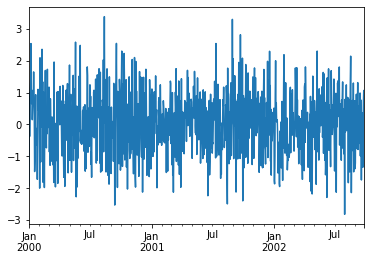

In [84]:
ts.plot();

In [86]:
plt.show();

In [87]:
# Ahora vamos a plotear una serie de datos como data frame
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


In [88]:
df

,A,B,C,D
2000-01-01,-0.947349,0.771307,0.473472,0.681808
2000-01-02,-1.715560,-1.328335,-0.822109,-0.270203
2000-01-03,-1.020773,0.591737,-2.121450,0.423797
2000-01-04,-0.722987,-1.841041,-2.081030,-0.004264
2000-01-05,-0.850344,-0.218833,-0.314492,0.561046
...,...,...,...,...
2002-09-22,1.696656,-0.534594,0.833473,-0.325474
2002-09-23,0.176595,-0.959484,0.203224,-0.495598
2002-09-24,2.143482,-0.151007,-1.883871,2.360063
2002-09-25,-0.038649,0.095205,-0.252373,1.749621


In [89]:
df = df.cumsum()

In [90]:
df

,A,B,C,D
2000-01-01,-0.947349,0.771307,0.473472,0.681808
2000-01-02,-2.662910,-0.557028,-0.348637,0.411604
2000-01-03,-3.683682,0.034709,-2.470088,0.835402
2000-01-04,-4.406669,-1.806333,-4.551117,0.831138
2000-01-05,-5.257013,-2.025166,-4.865610,1.392183
...,...,...,...,...
2002-09-22,72.481289,3.269388,7.260274,44.412783
2002-09-23,72.657884,2.309904,7.463498,43.917186
2002-09-24,74.801366,2.158897,5.579628,46.277249
2002-09-25,74.762717,2.254101,5.327254,48.026870


In [91]:
plt.figure();

<Figure size 432x288 with 0 Axes>

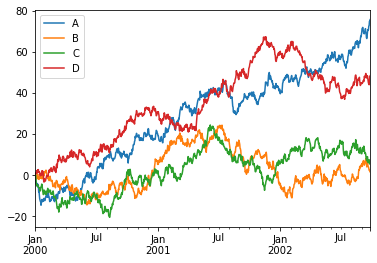

In [94]:
df.plot();
plt.legend(loc='best');

## Entrada/salida de tablas/datos

### Como leer/cargar un archivo. Se utiliza: pd.read_csvp pd.read_excel (Existen muchos otros formatos que puede leerse)

In [98]:
fifa = pd.read_csv("fifa_dplyr.csv")

In [100]:
fifa

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,overall,player_positions
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,94,"RW, CF, ST"
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,93,"ST, LW"
2,190871,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,92,"LW, CAM"
3,200389,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,GK
4,183277,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,Spain Primera Division,91,"LW, CF"
...,...,...,...,...,...,...,...,...,...,...,...,...
18478,245006,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,Chinese Super League,48,CB
18479,250995,Xiao Mingjie,肖明杰,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,Chinese Super League,48,CB
18480,252332,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,Chinese Super League,48,CM
18481,251110,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,Chinese Super League,48,CM


In [101]:
fifa.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,overall,player_positions
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,94,"RW, CF, ST"
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,93,"ST, LW"
2,190871,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,92,"LW, CAM"
3,200389,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,GK
4,183277,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,Spain Primera Division,91,"LW, CF"


In [102]:
fifa.tail()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,overall,player_positions
18478,245006,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,Chinese Super League,48,CB
18479,250995,Xiao Mingjie,肖明杰,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,Chinese Super League,48,CB
18480,252332,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,Chinese Super League,48,CM
18481,251110,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,Chinese Super League,48,CM
18482,233449,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,Chinese Super League,48,CM


In [103]:
fifa.describe()

,sofifa_id,age,height_cm,weight_kg,overall
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000
mean,219768.374885,25.283071,181.348212,75.259049,66.198885
std,28047.535516,4.656790,6.760648,7.053023,6.950927
min,41.000000,16.000000,155.000000,50.000000,48.000000
25%,204495.500000,22.000000,177.000000,70.000000,62.000000
50%,226215.000000,25.000000,181.000000,75.000000,66.000000
75%,240880.000000,29.000000,186.000000,80.000000,71.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000


### Leer/cargar archivo de Excel

In [106]:
employees = pd.read_excel("employee_demographics.xlsx")

In [108]:
employees

,EmployeeID,OrgTenureYrs_2019,JobLevel,Sex,RaceEthnicity,AgeYrs_2019,Veteran
0,1001,4.8,2,Female,Asian,49.8,No
1,1002,0.4,1,Male,Asian,25.4,No
2,1003,3.5,1,Male,HispanicLatino,23.5,No
3,1004,2.8,1,Female,White,40.8,No
4,1005,2.7,1,Female,HispanicLatino,28.7,No
...,...,...,...,...,...,...,...
158,1159,3.2,2,Male,HispanicLatino,40.2,No
159,1160,3.1,4,Female,HispanicLatino,45.1,No
160,1161,1.2,1,Male,Asian,44.2,No
161,1162,1.1,1,Male,Asian,45.1,Yes


In [109]:
employees.describe()

,EmployeeID,OrgTenureYrs_2019,JobLevel,AgeYrs_2019
count,163.000000,162.000000,163.000000,162.000000
mean,1082.000000,620.156173,1.895706,37.893210
std,47.198164,7856.436067,1.163294,9.070676
min,1001.000000,0.100000,1.000000,18.100000
25%,1041.500000,1.600000,1.000000,32.125000
50%,1082.000000,3.100000,1.000000,38.950000
75%,1122.500000,4.000000,2.000000,44.725000
max,1163.000000,99999.000000,5.000000,61.300000


### Para escribir/guardar una tabla, utilizaremos: df.to_csv

In [104]:
df.to_csv("foo.csv")